# ***Data Prep***

In [ ]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('Salt.csv', index_col = 'Date', parse_dates=True)

In [ ]:
df

,Price
Date,
2021-06-01,32.5
2021-06-02,32.5
2021-06-03,32.5
2021-06-04,32.5
2021-06-05,32.5
...,...
2022-11-26,37.5
2022-11-27,37.5
2022-11-28,37.5


In [ ]:
df.dropna()

,Price
Date,
2021-06-01,32.5
2021-06-02,32.5
2021-06-03,32.5
2021-06-04,32.5
2021-06-05,32.5
...,...
2022-11-26,37.5
2022-11-27,37.5
2022-11-28,37.5


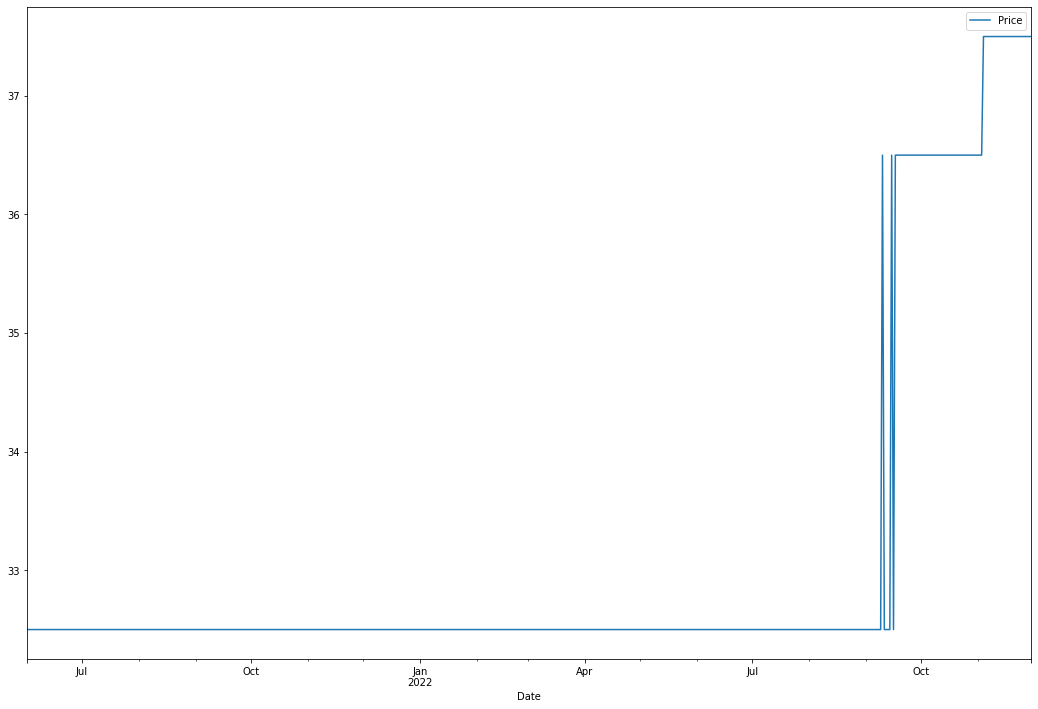

In [ ]:
df.plot(figsize = (18, 12));

In [ ]:
results = seasonal_decompose(df['Price'], model = 'addtive')

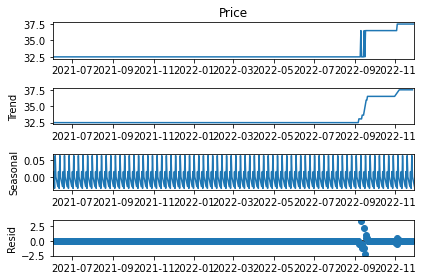

In [ ]:
results.plot();

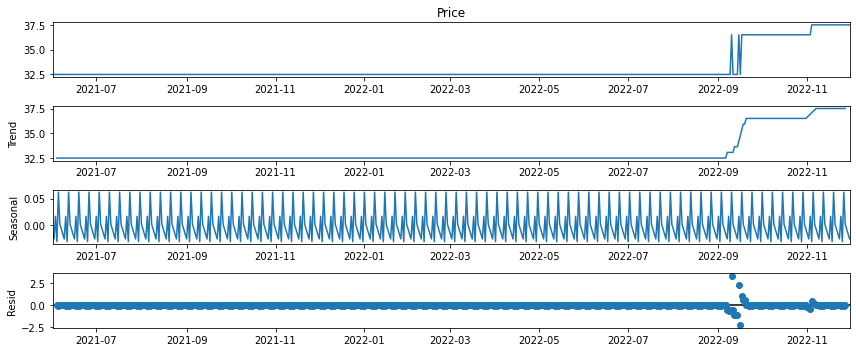

In [ ]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

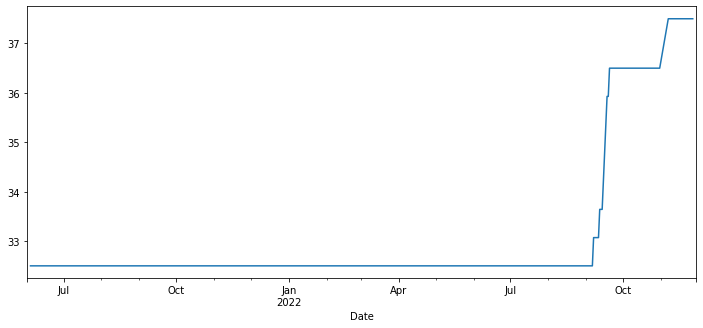

In [ ]:
results.trend.plot()

In [ ]:
df.index.freq = 'D'

In [ ]:
df.head()

,Price
Date,
2021-06-01,32.5
2021-06-02,32.5
2021-06-03,32.5
2021-06-04,32.5
2021-06-05,32.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [ ]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [ ]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [ ]:
test_predictions = fitted_model.forecast(49)

In [ ]:
test_predictions

2022-10-14    36.612404
2022-10-15    36.910036
2022-10-16    36.707642
2022-10-17    37.005063
2022-10-18    37.052414
2022-10-19    37.099635
2022-10-20    37.146739
2022-10-21    37.193739
2022-10-22    37.240630
2022-10-23    37.287396
2022-10-24    37.333239
2022-10-25    37.380208
2022-10-26    37.427080
2022-10-27    37.473855
2022-10-28    37.520522
2022-10-29    37.567078
2022-10-30    37.613530
2022-10-31    37.659883
2022-11-01    37.706128
2022-11-02    37.752257
2022-11-03    37.798299
2022-11-04    37.844233
2022-11-05    37.890028
2022-11-06    37.935732
2022-11-07    37.981349
2022-11-08    38.026850
2022-11-09    38.307514
2022-11-10    38.117556
2022-11-11    38.162744
2022-11-12    38.207823
2022-11-13    38.259365
2022-11-14    38.556997
2022-11-15    38.354603
2022-11-16    38.652024
2022-11-17    38.699375
2022-11-18    38.746596
2022-11-19    38.793700
2022-11-20    38.840700
2022-11-21    38.887591
2022-11-22    38.934356
2022-11-23    38.980200
2022-11-24    39

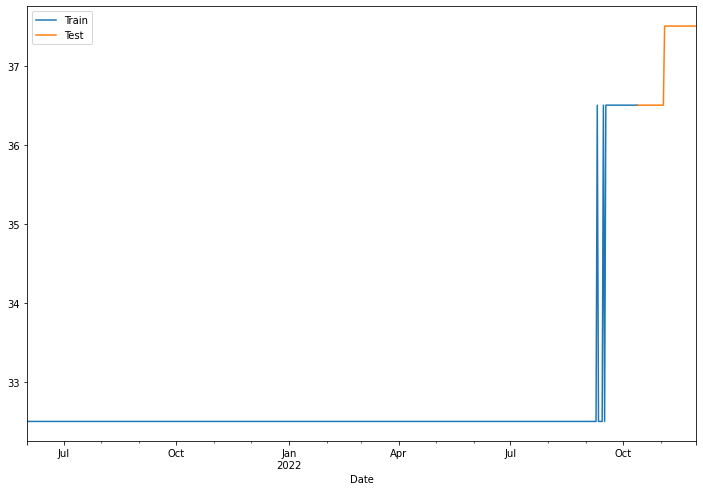

In [ ]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [ ]:
test_data.describe()

,Price
count,49.000000
mean,37.051020
std,0.502545
min,36.500000
25%,36.500000
50%,37.500000
75%,37.500000
max,37.500000


In [ ]:
mean_absolute_error(test_data,test_predictions)


1.0141037255645944

In [ ]:
mean_squared_error(test_data, test_predictions)

1.2231945669116404

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
rmse(test_data, test_predictions)

array([0.66315978, 0.51698497, 0.60440493, 0.49950875, 0.49739206,
       0.49976024, 0.50651645, 0.51746077, 0.53230506, 0.55069972,
       0.571878  , 0.59645729, 0.62355238, 0.65282905, 0.68397999,
       0.71673724, 0.75087536, 0.78620011, 0.82253415, 0.85972619,
       0.89767587, 0.93626026, 0.97536161, 1.01494425, 1.05494444,
       1.09528101, 1.3513601 , 1.17681528, 1.217919  , 1.25920165,
       1.30671119, 1.58598942, 1.39525095, 1.67648709, 1.72176375,
       1.76702372, 1.81227135, 1.85751202, 1.90273156, 1.94790955,
       1.99226791, 2.03778283, 2.08326848, 2.12871996, 2.17412278,
       2.21946956, 2.26476394, 2.31000784, 2.35518879])

In [ ]:
np.sqrt(mean_squared_error(test_data, test_predictions))

1.1059812687887804

In [ ]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [ ]:
forecast_predictions = final_model.forecast(60)

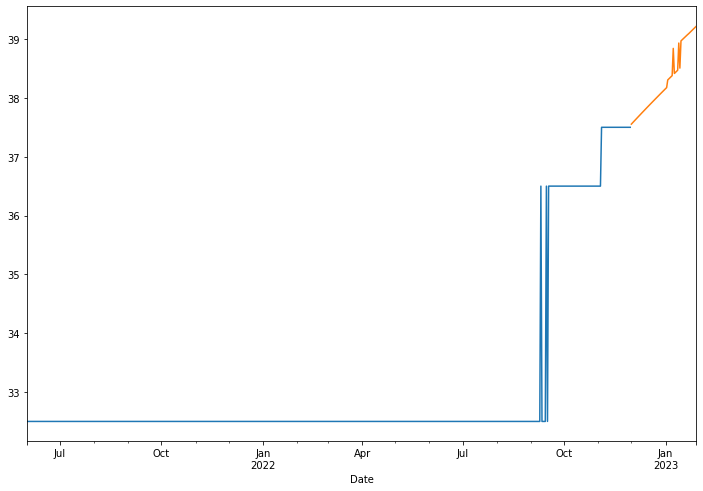

In [ ]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [ ]:
forecast_predictions

2022-12-01    23.697226
2022-12-02    24.086072
2022-12-03    23.808279
2022-12-04    24.363884
2022-12-05    24.308299
2022-12-06    24.030558
2022-12-07    24.586086
2022-12-08    24.808331
2022-12-09    24.697161
2022-12-10    24.363901
2022-12-11    24.141694
2022-12-12    24.030535
2022-12-13    24.030564
2022-12-14    24.419420
2022-12-15    24.030532
2022-12-16    24.141683
2022-12-17    23.641632
2022-12-18    23.974935
2022-12-19    24.586089
2022-12-20    24.586070
2022-12-21    24.697207
2022-12-22    25.086024
2022-12-23    25.141621
2022-12-24    24.752728
2022-12-25    24.252727
2022-12-26    24.308312
2022-12-27    24.419406
2022-12-28    24.530500
2022-12-29    24.974966
2022-12-30    25.252775
2022-12-31    24.919422
2023-01-01    24.308307
2023-01-02    24.975027
2023-01-03    24.586092
2023-01-04    24.530510
2023-01-05    24.530599
2023-01-06    24.475046
2023-01-07    24.808383
2023-01-08    24.808355
2023-01-09    24.752845
2023-01-10    24.641709
2023-01-11    24

# *SARIMAX*

In [ ]:
from datetime import datetime

In [ ]:
df_KN = pd.read_csv('Salt.csv', index_col = 'Date', parse_dates = True)

In [ ]:
df_KN.index.freq ='D'

In [ ]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_KN['Price'])

ADF Statistics: 0.26091193077604335
p- value: 0.9754783372359662
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [ ]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,32.5,NaN
2021-06-02,32.5,0.0
2021-06-03,32.5,0.0
2021-06-04,32.5,0.0
2021-06-05,32.5,0.0


In [ ]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: 0.26091193077604335
p- value: 0.9754783372359662
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [ ]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -8.435954803382888
p- value: 1.8165385954262213e-13
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [ ]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -3.6870212372272055
p- value: 0.0042994602927569165
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


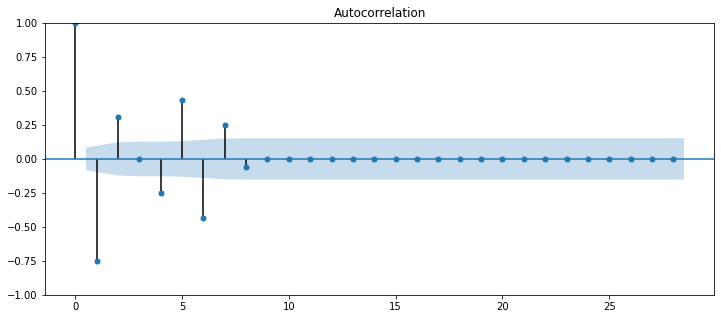

In [ ]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

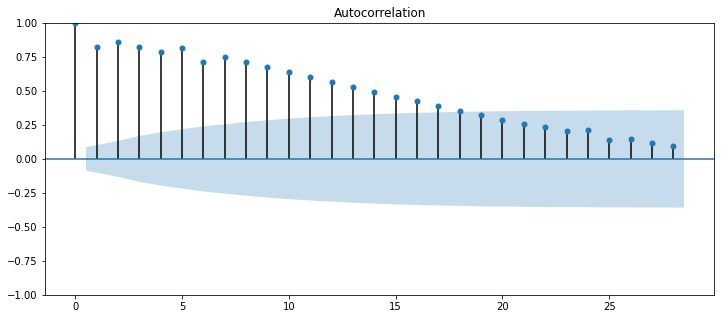

In [ ]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

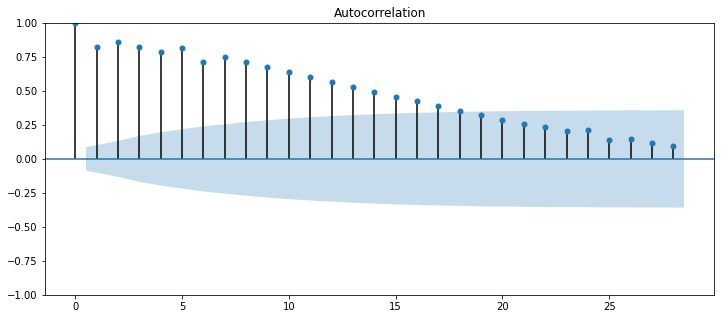

In [ ]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

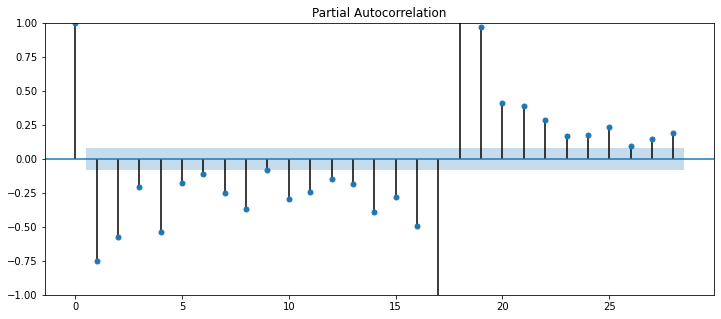

In [ ]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [ ]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [ ]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,36.5,0.0,0.0,4.0
2022-10-03,36.5,0.0,0.0,4.0
2022-10-04,36.5,0.0,0.0,4.0
2022-10-05,36.5,0.0,0.0,4.0
2022-10-06,36.5,0.0,0.0,4.0
2022-10-07,36.5,0.0,0.0,4.0
2022-10-08,36.5,0.0,0.0,4.0
2022-10-09,36.5,0.0,0.0,4.0
2022-10-10,36.5,0.0,0.0,0.0


In [ ]:
import statsmodels.api as sm

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import ARIMA

In [ ]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,32.5,NaN,NaN,NaN
2021-06-02,32.5,0.0,NaN,NaN
2021-06-03,32.5,0.0,0.0,NaN
2021-06-04,32.5,0.0,0.0,NaN
2021-06-05,32.5,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,36.5,0.0,0.0,4.0
2022-09-28,36.5,0.0,0.0,4.0
2022-09-29,36.5,0.0,0.0,4.0


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [ ]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [ ]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood                 -64.395
Date:                             Sat, 07 Jan 2023   AIC                            146.790
Time:                                     00:04:32   BIC                            183.932
Sample:                                 06-01-2021   HQIC                           161.418
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0605      0.031     -1.932      0.053      -0.122       0.001
ar.L2          0.6435      0.013     51.290      0.000       0.619       0.668
ar.L3          0.4080      0.037     11.047      0.000       0.336       0.480
ma.L1          0.5419      0.032     16.868      0.000       0.479       0.605
ma.L2          0.0257      0.026      0.976      0.329      -0.026       0.077
ma.L3         -0.3456      0.021    -16.228      0.000      -0.387      -0.304
ma.L4         -0.2723      0.038     -7.123      0.000      -0.347      -0.197
ma.L5          0.5474      0.033     16.551      0.000       0.483       0.612
sigma2         0.0750      0.001     75.618      0.000       0.073       0.077
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):            252044.89
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):       141860008.53   Skew:                             7.04
Prob(H) (two-sided):                  0.00   Kurtosis:                       117.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [ ]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

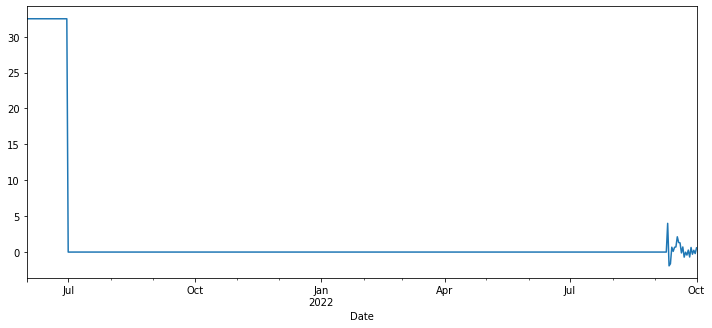

In [ ]:
model_SARIMAX_fit.resid.plot()

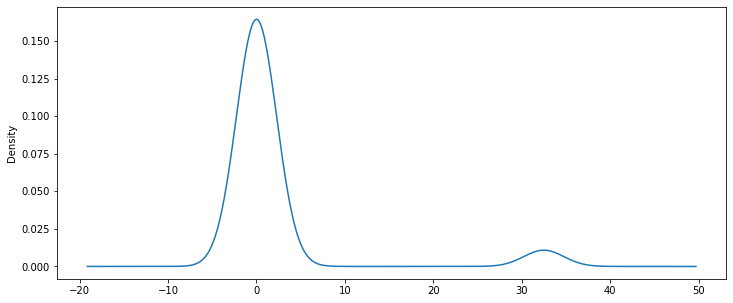

In [ ]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [ ]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,36.5,0.0,0.0,4.0,37.122889
2022-10-03,36.5,0.0,0.0,4.0,36.280809
2022-10-04,36.5,0.0,0.0,4.0,36.867829
2022-10-05,36.5,0.0,0.0,4.0,36.280575
2022-10-06,36.5,0.0,0.0,4.0,36.946742
2022-10-07,36.5,0.0,0.0,4.0,36.445857
2022-10-08,36.5,0.0,0.0,4.0,36.665268
2022-10-09,36.5,0.0,0.0,4.0,36.601454
2022-10-10,36.5,0.0,0.0,0.0,40.542150


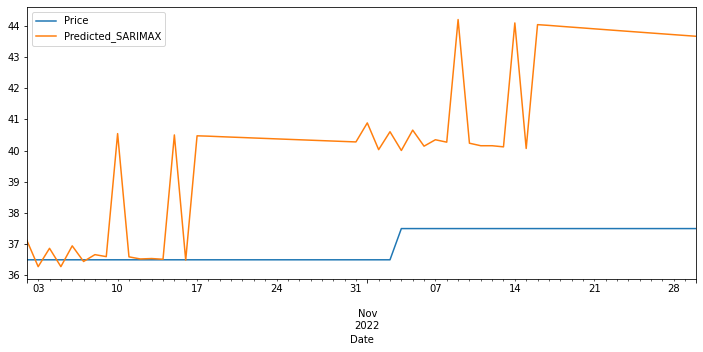

In [ ]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [ ]:
pred_Sarimax

2022-10-02    37.122889
2022-10-03    36.280809
2022-10-04    36.867829
2022-10-05    36.280575
2022-10-06    36.946742
2022-10-07    36.445857
2022-10-08    36.665268
2022-10-09    36.601454
2022-10-10    40.542150
2022-10-11    36.594193
2022-10-12    36.526843
2022-10-13    36.540215
2022-10-14    36.517298
2022-10-15    40.499811
2022-10-16    36.491577
2022-10-17    40.471472
2022-10-18    40.460255
2022-10-19    40.444637
2022-10-20    40.430161
2022-10-21    40.416410
2022-10-22    40.401554
2022-10-23    40.387697
2022-10-24    40.373365
2022-10-25    40.359255
2022-10-26    40.345232
2022-10-27    40.331153
2022-10-28    40.317224
2022-10-29    40.303285
2022-10-30    40.289420
2022-10-31    40.275607
2022-11-01    40.884722
2022-11-02    40.028930
2022-11-03    40.602280
2022-11-04    40.001409
2022-11-05    40.654009
2022-11-06    40.139605
2022-11-07    40.345547
2022-11-08    40.268313
2022-11-09    44.195639
2022-11-10    40.234360
2022-11-11    40.153736
2022-11-12    40

In [ ]:
predicted_value_SARIMA = pred_Sarimax

In [ ]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [ ]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

3.602484959224991

In [ ]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

17.88683506131638

In [ ]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

4.22928304341485

# ***FB Prophet***

In [ ]:
df_fb  = pd.read_csv('Salt.csv')

In [ ]:
df_fb.columns = ['ds', 'y']

In [ ]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [ ]:
df_fb.head()

,ds,y
0,2021-06-01,32.5
1,2021-06-02,32.5
2,2021-06-03,32.5
3,2021-06-04,32.5
4,2021-06-05,32.5


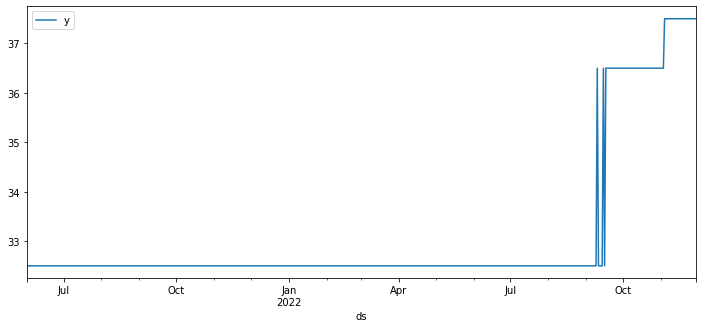

In [ ]:
df_fb.plot(x='ds', y='y')

In [ ]:
len(df_fb)

548

In [ ]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [ ]:
import prophet

In [ ]:
import io, os, sys, setuptools, tokenize

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,36.005714,35.400035,36.810381,35.862814,36.161184,0.077278,0.077278,0.077278,0.077278,0.077278,0.077278,0.0,0.0,0.0,36.082992
544,2022-11-27,36.031429,35.353006,36.702434,35.885076,36.191311,-0.011953,-0.011953,-0.011953,-0.011953,-0.011953,-0.011953,0.0,0.0,0.0,36.019476
545,2022-11-28,36.057145,35.348510,36.771946,35.906482,36.221850,-0.016268,-0.016268,-0.016268,-0.016268,-0.016268,-0.016268,0.0,0.0,0.0,36.040876
546,2022-11-29,36.082860,35.354682,36.765742,35.927872,36.251847,-0.020268,-0.020268,-0.020268,-0.020268,-0.020268,-0.020268,0.0,0.0,0.0,36.062592
547,2022-11-30,36.108575,35.376811,36.776164,35.949149,36.282560,-0.024458,-0.024458,-0.024458,-0.024458,-0.024458,-0.024458,0.0,0.0,0.0,36.084117


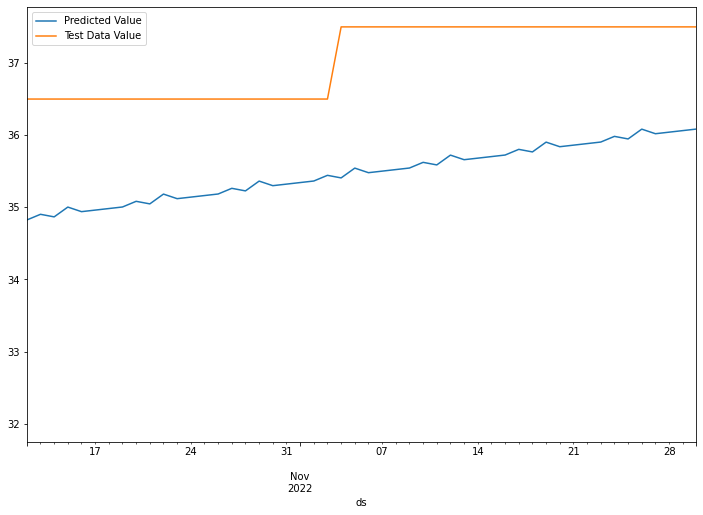

In [ ]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [ ]:
predictions_fb

488    34.579423
489    34.600823
490    34.622539
491    34.644064
492    34.722736
493    34.687124
494    34.822945
495    34.759430
496    34.780830
497    34.802546
498    34.824071
499    34.902742
500    34.867131
501    35.002952
502    34.939436
503    34.960837
504    34.982553
505    35.004078
506    35.082749
507    35.047137
508    35.182959
509    35.119443
510    35.140843
511    35.162559
512    35.184084
513    35.262756
514    35.227144
515    35.362965
516    35.299450
517    35.320850
518    35.342566
519    35.364091
520    35.442762
521    35.407151
522    35.542972
523    35.479456
524    35.500856
525    35.522572
526    35.544097
527    35.622769
528    35.587157
529    35.722978
530    35.659463
531    35.680863
532    35.702579
533    35.724104
534    35.802775
535    35.767164
536    35.902985
537    35.839469
538    35.860870
539    35.882586
540    35.904111
541    35.982782
542    35.947170
543    36.082992
544    36.019476
545    36.040876
546    36.0625

In [ ]:
test_fb

,ds,y
488,2022-10-02,36.5
489,2022-10-03,36.5
490,2022-10-04,36.5
491,2022-10-05,36.5
492,2022-10-06,36.5
493,2022-10-07,36.5
494,2022-10-08,36.5
495,2022-10-09,36.5
496,2022-10-10,36.5
497,2022-10-11,36.5


In [ ]:
mean_absolute_error(test_fb['y'], predictions_fb)

1.6012399673066762

In [ ]:
mean_squared_error(test_fb['y'], predictions_fb)

2.6292144051818123

In [ ]:
rmse(predictions_fb, test_fb['y'])

1.621485246674114

In [ ]:
test_fb.mean()

y    36.95
dtype: float64

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [ ]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [ ]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,32.5,32.5,32.5,32.5,2022-08-02
1,2022-08-04,32.5,32.5,32.5,32.5,2022-08-02
2,2022-08-05,32.5,32.5,32.5,32.5,2022-08-02
3,2022-08-06,32.5,32.5,32.5,32.5,2022-08-02
4,2022-08-07,32.5,32.5,32.5,32.5,2022-08-02


In [ ]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,7 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,8 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,9 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,10 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5,11 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
6,12 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
7,13 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
8,14 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
9,15 days,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


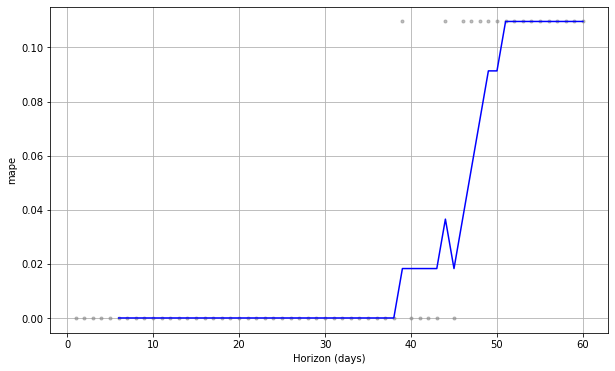

In [ ]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [ ]:
df_t = pd.read_csv('Salt.csv')

In [ ]:
df_t.columns = ['ds', 'y']

In [ ]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [ ]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [ ]:
t.fit(df_t)

In [ ]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

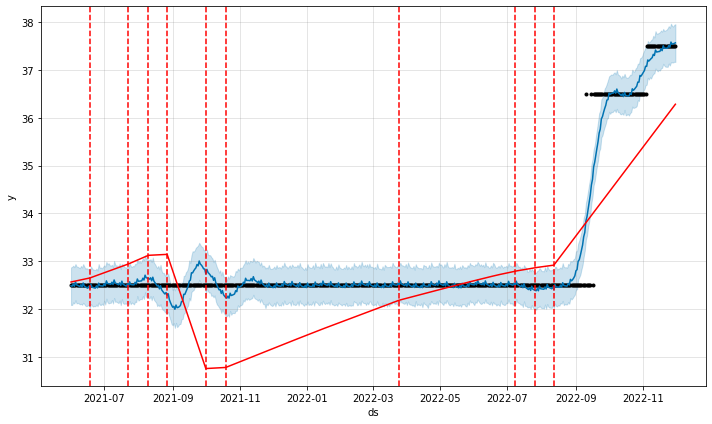

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [ ]:
df_S = pd.read_csv('Salt.csv')

In [ ]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


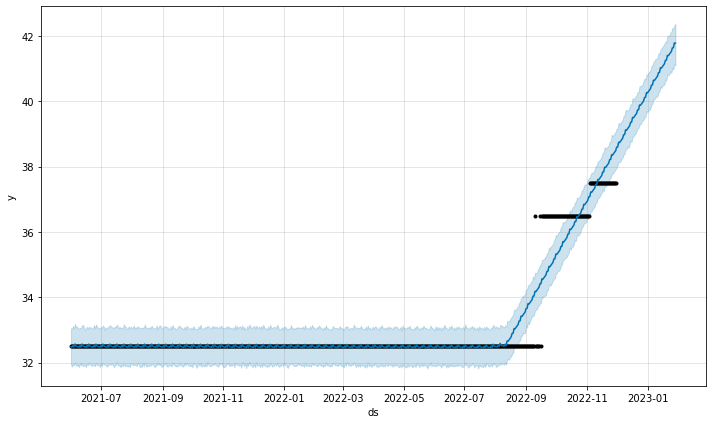

In [ ]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

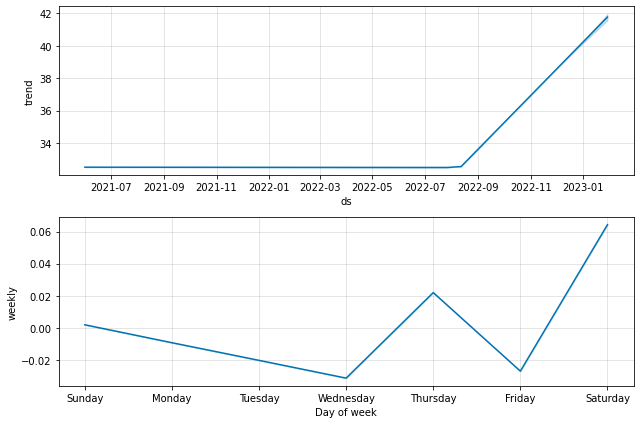

In [ ]:
figure = S.plot_components(forecast);

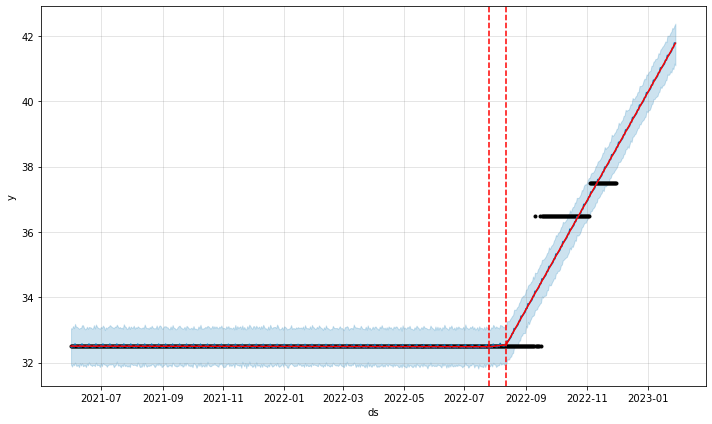

In [ ]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


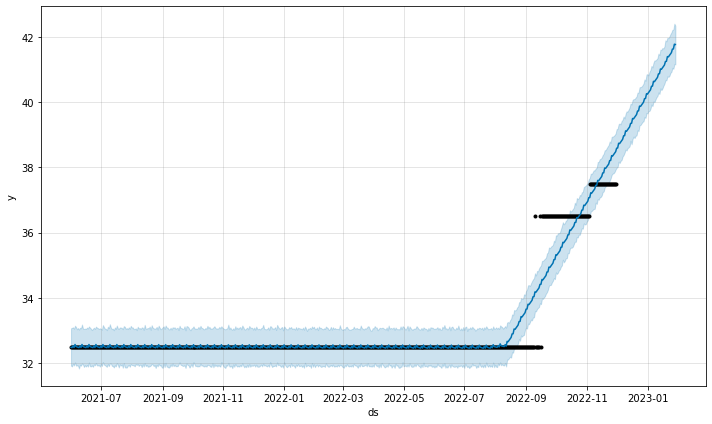

In [ ]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

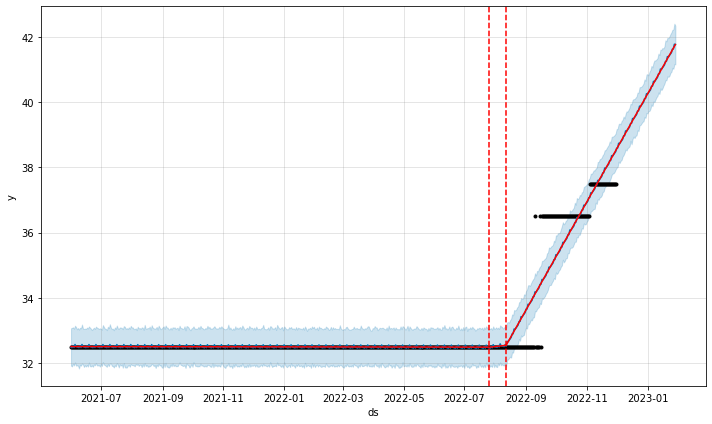

In [ ]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

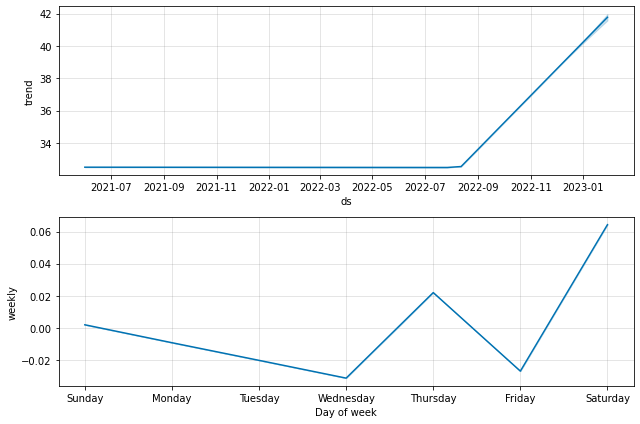

In [ ]:
figure = S.plot_components(forecast)

# ***LSTM***

In [ ]:
df_LSTM=pd.read_csv("Salt.csv",parse_dates=["Date"],index_col=[0])

In [ ]:
print(df_LSTM.index.freq)

None


In [ ]:
test_split=round(len(df_LSTM)*0.20)

In [ ]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [ ]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [ ]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [ ]:
df_for_training_scaled

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
df_for_training_scaled.shape

(438, 1)

In [ ]:
df_for_testing_scaled.shape

(110, 1)

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [ ]:
trainX.shape

(408, 30, 1)

In [ ]:
testX,testY=createXY(df_for_testing_scaled,30)

In [ ]:
trainX[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [ ]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

trainY[0]--  0.0


In [ ]:
trainY[0]

0.0

In [ ]:
trainY.shape

(408,)

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 4s 84ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 2/32
13/13 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 3/32
13/13 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 4/32
13/13 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 5/32
13/13 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 6/32
13/13 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 7/32
13/13 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 8/32
13/13 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 9/32
13/13 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - val_loss: 19.2738
Epoch 10/32
13/13 [==============================] - 0s 24ms/ste

In [ ]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 32, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
my_model

In [ ]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 9ms/step


In [ ]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[-0.04619805]
 [-0.05022671]
 [-0.04793464]
 [-0.04246752]
 [-0.06451061]
 [-0.0734642 ]
 [-0.09579178]
 [-0.12218717]
 [-0.14579445]
 [-0.16429682]
 [-0.17754953]
 [-0.18633316]
 [-0.19167033]
 [-0.19451289]
 [-0.19563241]
 [-0.1956088 ]
 [-0.19485763]
 [-0.19366798]
 [-0.19223635]
 [-0.19069418]
 [-0.18912807]
 [-0.18759389]
 [-0.18612693]
 [-0.18474835]
 [-0.18346986]
 [-0.18229651]
 [-0.18122911]
 [-0.18026543]
 [-0.17940125]
 [-0.17909169]
 [-0.17834973]
 [-0.17769518]
 [-0.17712045]
 [-0.17661813]
 [-0.17658707]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.1761539 ]
 [-0.17098486]
 [-0.16822138]
 [-0.16640002]
 [-0.16528587]
 [-0.16463253]
 [-0.16427325]
 [-0.16409504]
 [-0.16402212]
 [-0.16400428]
 [-0.16400917]
 [-0.16401684]
 [-0.16401596

In [ ]:
scaler.inverse_transform(prediction)

array([[32.4538  ],
       [32.44977 ],
       [32.452065],
       [32.45753 ],
       [32.43549 ],
       [32.426537],
       [32.40421 ],
       [32.37781 ],
       [32.354206],
       [32.335705],
       [32.32245 ],
       [32.313667],
       [32.30833 ],
       [32.30549 ],
       [32.304367],
       [32.30439 ],
       [32.30514 ],
       [32.30633 ],
       [32.307762],
       [32.309307],
       [32.31087 ],
       [32.312405],
       [32.313873],
       [32.31525 ],
       [32.31653 ],
       [32.317703],
       [32.31877 ],
       [32.319733],
       [32.3206  ],
       [32.320908],
       [32.32165 ],
       [32.322304],
       [32.32288 ],
       [32.323383],
       [32.323414],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],
       [32.323845],


In [ ]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [ ]:
prediction_copies_array.shape

(80, 1)

In [ ]:
prediction_copies_array

array([[-0.04619805],
       [-0.05022671],
       [-0.04793464],
       [-0.04246752],
       [-0.06451061],
       [-0.0734642 ],
       [-0.09579178],
       [-0.12218717],
       [-0.14579445],
       [-0.16429682],
       [-0.17754953],
       [-0.18633316],
       [-0.19167033],
       [-0.19451289],
       [-0.19563241],
       [-0.1956088 ],
       [-0.19485763],
       [-0.19366798],
       [-0.19223635],
       [-0.19069418],
       [-0.18912807],
       [-0.18759389],
       [-0.18612693],
       [-0.18474835],
       [-0.18346986],
       [-0.18229651],
       [-0.18122911],
       [-0.18026543],
       [-0.17940125],
       [-0.17909169],
       [-0.17834973],
       [-0.17769518],
       [-0.17712045],
       [-0.17661813],
       [-0.17658707],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0.1761539 ],
       [-0

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [ ]:
pred

array([32.4538  , 32.44977 , 32.452065, 32.45753 , 32.43549 , 32.426537,
       32.40421 , 32.37781 , 32.354206, 32.335705, 32.32245 , 32.313667,
       32.30833 , 32.30549 , 32.304367, 32.30439 , 32.30514 , 32.30633 ,
       32.307762, 32.309307, 32.31087 , 32.312405, 32.313873, 32.31525 ,
       32.31653 , 32.317703, 32.31877 , 32.319733, 32.3206  , 32.320908,
       32.32165 , 32.322304, 32.32288 , 32.323383, 32.323414, 32.323845,
       32.323845, 32.323845, 32.323845, 32.323845, 32.323845, 32.323845,
       32.323845, 32.323845, 32.323845, 32.323845, 32.323845, 32.323845,
       32.323845, 32.323845, 32.323845, 32.323845, 32.323845, 32.323845,
       32.329014, 32.33178 , 32.3336  , 32.334713, 32.33537 , 32.335728,
       32.335903, 32.33598 , 32.335995, 32.33599 , 32.335983, 32.335983,
       32.336   , 32.33603 , 32.33608 , 32.336136, 32.33621 , 32.336285,
       32.33637 , 32.336452, 32.33654 , 32.336624, 32.336708, 32.33679 ,
       32.33686 , 32.336933], dtype=float32)

In [ ]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [ ]:
pred

array([32.4538  , 32.44977 , 32.452065, 32.45753 , 32.43549 , 32.426537,
       32.40421 , 32.37781 , 32.354206, 32.335705, 32.32245 , 32.313667,
       32.30833 , 32.30549 , 32.304367, 32.30439 , 32.30514 , 32.30633 ,
       32.307762, 32.309307, 32.31087 , 32.312405, 32.313873, 32.31525 ,
       32.31653 , 32.317703, 32.31877 , 32.319733, 32.3206  , 32.320908,
       32.32165 , 32.322304, 32.32288 , 32.323383, 32.323414, 32.323845,
       32.323845, 32.323845, 32.323845, 32.323845, 32.323845, 32.323845,
       32.323845, 32.323845, 32.323845, 32.323845, 32.323845, 32.323845,
       32.323845, 32.323845, 32.323845, 32.323845, 32.323845, 32.323845,
       32.329014, 32.33178 , 32.3336  , 32.334713, 32.33537 , 32.335728,
       32.335903, 32.33598 , 32.335995, 32.33599 , 32.335983, 32.335983,
       32.336   , 32.33603 , 32.33608 , 32.336136, 32.33621 , 32.336285,
       32.33637 , 32.336452, 32.33654 , 32.336624, 32.336708, 32.33679 ,
       32.33686 , 32.336933], dtype=float32)

In [ ]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [32.4538   32.44977  32.452065 32.45753  32.43549  32.426537 32.40421
 32.37781  32.354206 32.335705 32.32245  32.313667 32.30833  32.30549
 32.304367 32.30439  32.30514  32.30633  32.307762 32.309307 32.31087
 32.312405 32.313873 32.31525  32.31653  32.317703 32.31877  32.319733
 32.3206   32.320908 32.32165  32.322304 32.32288  32.323383 32.323414
 32.323845 32.323845 32.323845 32.323845 32.323845 32.323845 32.323845
 32.323845 32.323845 32.323845 32.323845 32.323845 32.323845 32.323845
 32.323845 32.323845 32.323845 32.323845 32.323845 32.329014 32.33178
 32.3336   32.334713 32.33537  32.335728 32.335903 32.33598  32.335995
 32.33599  32.335983 32.335983 32.336    32.33603  32.33608  32.336136
 32.33621  32.336285 32.33637  32.336452 32.33654  32.336624 32.336708
 32.33679  32.33686  32.336933]

Original Values--  [32.5 32.5 32.5 36.5 32.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5
 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5 36.5
 36.5 36.

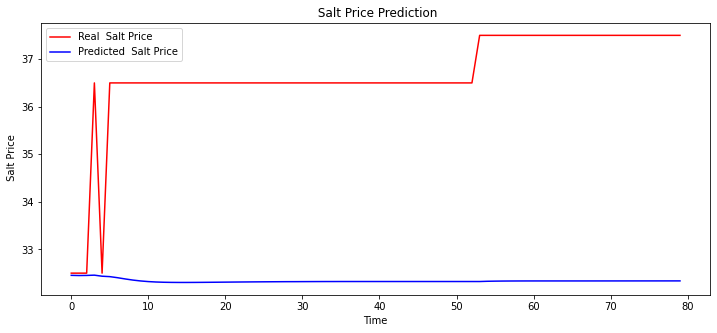

In [ ]:
plt.plot(original, color = 'red', label = 'Real  Salt Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Salt Price')
plt.title(' Salt Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Salt Price')
plt.legend()
plt.show()

In [ ]:
mean_absolute_error(original, pred)

4.301328325271607

In [ ]:
mean_squared_error(original, pred)

19.66652195217157

In [ ]:
rmse(pred, original)

4.43469524907536